# Support Vector Machine Model

# Imports

In [42]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn import preprocessing

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
# For use with dark backgrounds
plt.style.use('dark_background')

# Read in both .csv data

In [3]:
weird = pd.read_csv('./data/weird.csv')
weird.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,url,url_overridden_by_dest,whitelist_status,wls,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color
0,0,[],False,MaryRUy,NaN,[],NaN,text,t2_9ccpwdcv,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,KatieLovely,NaN,[],NaN,text,t2_9ccqgchl,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,AnaHebert,NaN,[],NaN,text,t2_9camkkdh,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,MarieLoar,NaN,[],NaN,text,t2_9cb1ecek,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,HazelDobson,NaN,[],NaN,text,t2_9calvc6h,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stupid = pd.read_csv('./data/stupid.csv')
stupid.head() 

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,url,url_overridden_by_dest,whitelist_status,wls,media,media_embed,secure_media,secure_media_embed,Unnamed: 68,Unnamed: 69
0,0,[],False,Gtrfdvj80,NaN,[],NaN,text,t2_8wh5i7yk,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Shhgljk120,NaN,[],NaN,text,t2_8wh2q8f4,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Wjdfhfnjufj1,NaN,[],NaN,text,t2_8w0ubz3o,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Edhjhchc,NaN,[],NaN,text,t2_8w0ssjqf,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,CHGS1212,NaN,[],NaN,text,t2_8uqhao3y,False,...,https://www.thegeniescript.com/order-452770391...,https://www.thegeniescript.com/order-452770391...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN


# Append and check data

In [5]:
df = weird.append(stupid)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2000 non-null   int64  
 1   all_awardings                  2000 non-null   object 
 2   allow_live_comments            2000 non-null   bool   
 3   author                         2000 non-null   object 
 4   author_flair_css_class         0 non-null      float64
 5   author_flair_richtext          1990 non-null   object 
 6   author_flair_text              0 non-null      float64
 7   author_flair_type              1990 non-null   object 
 8   author_fullname                1990 non-null   object 
 9   author_patreon_flair           1990 non-null   object 
 10  author_premium                 1990 non-null   object 
 11  awarders                       2000 non-null   object 
 12  can_mod_post                   2000 non-null   bo

In [6]:
df.shape

(2000, 72)

# Reindex columns

In [7]:
df.set_index(df['subreddit'])

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,whitelist_status,wls,media,media_embed,secure_media,secure_media_embed,author_flair_background_color,author_flair_text_color,Unnamed: 68,Unnamed: 69
subreddit,,,,,,,,,,,,,,,,,,,,,
NewsOfTheWeird,0,[],False,MaryRUy,NaN,[],NaN,text,t2_9ccpwdcv,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewsOfTheWeird,1,[],False,KatieLovely,NaN,[],NaN,text,t2_9ccqgchl,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewsOfTheWeird,2,[],False,AnaHebert,NaN,[],NaN,text,t2_9camkkdh,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewsOfTheWeird,3,[],False,MarieLoar,NaN,[],NaN,text,t2_9cb1ecek,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewsOfTheWeird,4,[],False,HazelDobson,NaN,[],NaN,text,t2_9calvc6h,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NewsOfTheStupid,95,[],False,Hopeful_Hair6908,NaN,[],NaN,text,t2_8kms8j4y,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewsOfTheStupid,96,[],False,Hopeful_Hair6908,NaN,[],NaN,text,t2_8kms8j4y,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NewsOfTheStupid,97,[],False,Glum-Kick-9168,NaN,[],NaN,text,t2_8oluidz2,False,...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Chose important columns

In [8]:
# Important columns to help build out our model (what subreddit it came from and what the contents are)

df = df[['subreddit','selftext','title']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2000 non-null   object
 1   selftext   20 non-null     object
 2   title      2000 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB


# DATA CLEANING

# Check for null values

In [9]:
df.columns[df.isna().any()].tolist()

['selftext']

In [10]:
df.isnull().sum()

subreddit       0
selftext     1980
title           0
dtype: int64

# Fix nulls

In [11]:
df['selftext'] = df['selftext'].fillna(0)

In [12]:
df.columns[df.isna().any()].tolist()

[]

# Check for unique values

In [13]:
n = len(pd.unique(df['title']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 95


In [14]:
sorted(list(df['title'].unique()), reverse=True)[0:5]

['\uf8ffüö£‚Äç‚ôÄÔ∏è',
 '‚ÄòThe Price Is Right‚Äô Game During Operations Sees Doctors Investigated',
 '‚ÄòJasmin Ke Ghar Hum Jaenge‚Äô trends top on Twitter; Check out‚Ä¶ ‚ÄòJasmin Ke Ghar Hum Jaenge‚Äô trends top on Twitter; Check out‚Ä¶',
 'what should happen to this man?',
 '[]']

In [15]:
df['title'].drop_duplicates()

0      (1) New Message - Start Living The Life You‚Äô...
10     Meghan Markle, Prince Harry's fan-created GoFu...
11     German Assistance Showing Interest in for Chil...
12     BurningCloud transformed OVH fire in a clean w...
13     Meet the lady who claims to have children with...
                             ...                        
107    Southwest pilot on hot mic goes on expletive-l...
108    Trump Wax Figure Removed From Exhibit In Texas...
111    Far-right extremists move from ‚ÄòStop the Ste...
113    HOODRATS Have A Big Brawl In The Street During...
600                                                   []
Name: title, Length: 95, dtype: object

In [16]:
n = len(pd.unique(df['subreddit']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2000 non-null   object
 1   selftext   2000 non-null   object
 2   title      2000 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB


# Pre-Processing

Pre-processing steps for text data:

- Label Encoder
- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal

# Removing special characters & Tokenizing

# Tokenizing

In [18]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
df['title'] = [tokenizer.tokenize(row) for row in df['title']]
df.title

0      [(1), New, Message, -, Start, Living, The, Lif...
1      [(1), New, Message, -, Start, Living, The, Lif...
2      [(1), New, Message, -, Start, Living, The, Lif...
3      [(1), New, Message, -, Start, Living, The, Lif...
4      [(1), New, Message, -, Start, Living, The, Lif...
                             ...                        
995    [Shaadi, Mubarak, :, KT, and, Preeti, got, stu...
996    [Splitsvilla, X3, 13th, March, 2021, Episode, ...
997    [Pinjara, Khubsurti, Ka, -, 'The, latest, trag...
998    [ALI, ZAFAR, BIOGRAPHY, ,, STRUGGLE, IN, THE, ...
999    [Splitsvilla, X3, 13th, March, 2021, Episode, ...
Name: title, Length: 2000, dtype: object

# STOPWORDS

In [19]:
stop_words = stopwords.words('english')
new_stop_words = ['[deleted]',
                  'Bigg', 
                  'Boss', 
                  '14', 
                  ':', 
                  'Comedian', 
                  'Bharti', 
                  'Singh', 
                  'reveals', 
                  'she', 
                  '‚Ä¶']

                  
stop_words.append(new_stop_words)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
for row in df['title']:
    for word in row:
        if word in stop_words:
            row.remove(word)

In [21]:
df['title'] = df['title'].astype(str)

In [22]:
tokens = df['title'].apply(word_tokenize)

In [23]:
print('\n'.join(''.join(elems) for elems in df['title']))

['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Living', 'The', 'Life', 'You', '‚Äôre', 'Dreaming', 'Of', '...']
['(1)', 'New', 'Message', '-', 'Start', 'Livin

# Support Vector Machine Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['title'],df['subreddit'],test_size=0.33,random_state=42)

# Label Encoder/Set up X and y

In [25]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [26]:
tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit(df['title'])

TfidfVectorizer(max_features=5000)

In [27]:
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# SVM Model

In [30]:
svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm.fit(X_train_tfidf,y_train)

SVC(gamma='auto', kernel='linear')

# Score model

In [34]:
print(svm.score(X_train_tfidf, y_train))

0.7432835820895523


In [33]:
print(svm.score(X_test_tfidf, y_test))

0.7333333333333333


# Accuracy Score

In [35]:
# Generate predictions.

y_pred = svm.predict(X_test_tfidf)

In [36]:
# Measure performance based on accuracy.

print(accuracy_score(y_test, y_pred))

0.7333333333333333


# Confusion Matrix

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
print(cm)

[[314  21]
 [155 170]]


<Figure size 1080x1080 with 0 Axes>

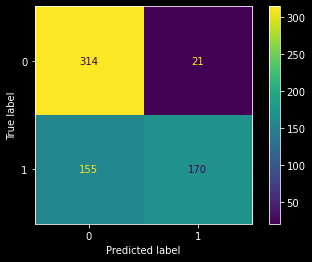

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
plt.figure(figsize=(15,15));
disp.plot();

# Classification Report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       335
           1       0.89      0.52      0.66       325

    accuracy                           0.73       660
   macro avg       0.78      0.73      0.72       660
weighted avg       0.78      0.73      0.72       660

